Found 12557 images belonging to 21 classes.
Found 12557 images belonging to 21 classes.


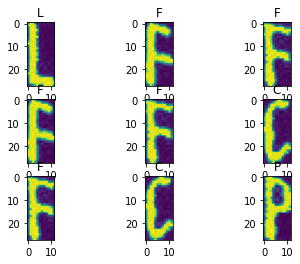

In [1]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z']

ds = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=128,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

validation_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=128,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

input_shape = train_ds[0][0][0].shape

fig, axs = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (14,14)

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(validation_ds[0][0][i + j])
        axs[i, j].set_title(class_names[int(validation_ds[0][1][i + j])])

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu', 
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 12, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 12, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 12, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 12, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 6, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 6, 32)         4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 6, 32)         9

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') > 0.999 and logs.get('accuracy') > 0.999) :
            print('\nReached 99% accuracy so stopping training')
            self.model.stop_training = True

In [6]:
callback = stopCallback()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel\\version6.hdf5',
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

history = model.fit(train_ds, 
                    epochs=125, 
                    callbacks=[model_checkpoint_callback], 
                    validation_data=validation_ds)

Epoch 1/125
99/99 [==============================] - 9s 89ms/step - loss: 1.2371 - accuracy: 0.6846 - val_loss: 2.7740 - val_accuracy: 0.2008
Epoch 2/125
99/99 [==============================] - 9s 89ms/step - loss: 0.3521 - accuracy: 0.9173 - val_loss: 2.3852 - val_accuracy: 0.3428
Epoch 3/125
99/99 [==============================] - 9s 88ms/step - loss: 0.2322 - accuracy: 0.9458 - val_loss: 1.6500 - val_accuracy: 0.6111
Epoch 4/125
99/99 [==============================] - 9s 90ms/step - loss: 0.1801 - accuracy: 0.9562 - val_loss: 0.7932 - val_accuracy: 0.8167
Epoch 5/125
99/99 [==============================] - 9s 89ms/step - loss: 0.1471 - accuracy: 0.9648 - val_loss: 0.2041 - val_accuracy: 0.9617
Epoch 6/125
99/99 [==============================] - 9s 89ms/step - loss: 0.1362 - accuracy: 0.9647 - val_loss: 0.0868 - val_accuracy: 0.9791
Epoch 7/125
99/99 [==============================] - 9s 90ms/step - loss: 0.1207 - accuracy: 0.9681 - val_loss: 0.0630 - val_accuracy: 0.9843
Epoch 

In [1]:
H = {}
H['number'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='accuracy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 3)

NameError: name 'history' is not defined